### 딥러닝

#### 심층신경망

In [21]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [22]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 이전창에서 다운로드 했기 때문에 다시 다운로드 하지 않음

In [23]:
# 훈련세트, 검증세트 분리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
train_input = train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)

In [25]:
# 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))

In [26]:
# 훈련세트,  검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [27]:
print(train_scaled.shape, test_scaled.shape)
print(train_target.shape, test_target.shape)

(48000, 784) (10000, 784)
(48000,) (10000,)


#### 심층신경망 만들기

In [30]:
# 밀집층 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [31]:
# 신경망 모델 생성
model = keras.Sequential([dense1, dense2])

In [33]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 심층신경망 만들기2

In [38]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_Model')

In [39]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 훈련전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [42]:
# 훈련
model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 1s 870us/step - loss: 0.2278 - accuracy: 0.9205
Epoch 2/10
1500/1500 [==============================] - 1s 922us/step - loss: 0.2137 - accuracy: 0.9251
Epoch 3/10
1500/1500 [==============================] - 1s 887us/step - loss: 0.2022 - accuracy: 0.9284
Epoch 4/10
1500/1500 [==============================] - 1s 869us/step - loss: 0.1914 - accuracy: 0.9329
Epoch 5/10
1500/1500 [==============================] - 1s 897us/step - loss: 0.1820 - accuracy: 0.9369
Epoch 6/10
1500/1500 [==============================] - 1s 898us/step - loss: 0.1717 - accuracy: 0.9414
Epoch 7/10
1500/1500 [==============================] - 1s 908us/step - loss: 0.1643 - accuracy: 0.9434
Epoch 8/10
1500/1500 [==============================] - 1s 876us/step - loss: 0.1558 - accuracy: 0.9465
Epoch 9/10
1500/1500 [==============================] - 1s 885us/step - loss: 0.1480 - accuracy: 0.9491
Epoch 10/10
1500/1500 [==============================] - 1s 877u

In [44]:
model.evaluate(val_scaled, val_target)
# 검증 정확도 :88.7%

375/375 [==============================] - 0s 680us/step - loss: 0.3693 - accuracy: 0.8869


[0.3693265914916992, 0.8869166374206543]

In [ ]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 0s 728us/step


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [61]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [71]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]

    # plt.title(f'실제: {true_label}, 예측: {pred_label}')
    plt.title('', fontsize=13)
    plt.text(0, -6, f'실제 : {true_label}', fontsize=12, color='blue')
    plt.text(0, -3, f'예측 : {pred_label}', fontsize=12, color='red', fontweight='bold')

    
    plt.axis('off')
    plt.show()

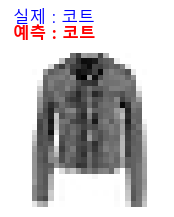

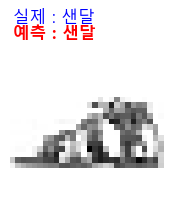

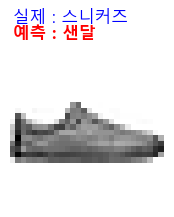

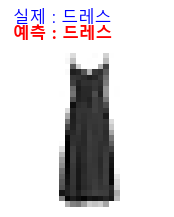

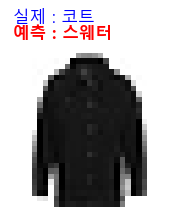

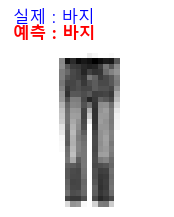

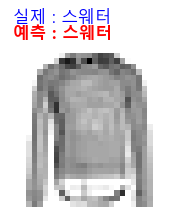

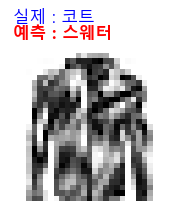

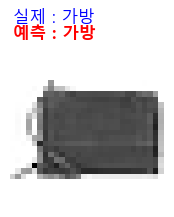

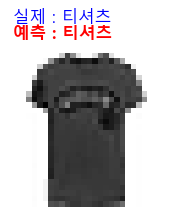

In [72]:
for i in range(10, 20):
    show_image(i)

#### 렐루 함수

- 인공신경망 은닉층에 초기에는 Sigmoid 함수 사용
	- 단점 : 오른쪽, 왼쪽 끝으로 갈 수록 그래프가 누워있어서 올바른 출력을 못 만듦

- 렐루함수(ReLU) : 

	<img src="../image/ml0011.png" width="600">

#### Flatten 객체
- 이미지 2차원 배열을 1차원으로 변경할 때 np.reshape() 사용
- Flatten 클래스가 위의 일을 대신해줌

In [73]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output'),
], name='Fashion_MNIST_RELU')

In [74]:
model2.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [77]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [78]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [79]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [80]:
# 모델 훈련
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 933us/step - loss: 0.5323 - accuracy: 0.8124
Epoch 2/20
1500/1500 [==============================] - 1s 913us/step - loss: 0.3917 - accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 1s 973us/step - loss: 0.3534 - accuracy: 0.8715
Epoch 4/20
1500/1500 [==============================] - 1s 951us/step - loss: 0.3330 - accuracy: 0.8792
Epoch 5/20
1500/1500 [==============================] - 1s 923us/step - loss: 0.3155 - accuracy: 0.8865
Epoch 6/20
1500/1500 [==============================] - 1s 912us/step - loss: 0.3056 - accuracy: 0.8906
Epoch 7/20
1500/1500 [==============================] - 1s 963us/step - loss: 0.2950 - accuracy: 0.8945
Epoch 8/20
1500/1500 [==============================] - 1s 959us/step - loss: 0.2847 - accuracy: 0.8999
Epoch 9/20
1500/1500 [==============================] - 1s 969us/step - loss: 0.2791 - accuracy: 0.9009
Epoch 10/20
1500/1500 [==============================] - 1s 964u

In [82]:
model2.evaluate(val_scaled, val_target)
# ReLU 함수 사용시, Sigmod 함수 사용시 0.01% 개선

375/375 [==============================] - 0s 719us/step - loss: 0.5157 - accuracy: 0.8747


[0.5157062411308289, 0.874666690826416]

#### 옵티마이저
- 하이퍼파라미터값 최적화

In [83]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output'),
], name='Fashion_MNIST_RELU')

In [ ]:
# 모델3 설정, 최적화는 adam 클래스만 사용
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer = 'adam')

In [86]:
# 모델 훈련. 모델 훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 1s 931us/step - loss: 0.1845 - accuracy: 0.9294
Epoch 2/20
1500/1500 [==============================] - 1s 931us/step - loss: 0.1806 - accuracy: 0.9330
Epoch 3/20
1500/1500 [==============================] - 1s 915us/step - loss: 0.1766 - accuracy: 0.9332
Epoch 4/20
1500/1500 [==============================] - 1s 910us/step - loss: 0.1716 - accuracy: 0.9353
Epoch 5/20
1500/1500 [==============================] - 1s 937us/step - loss: 0.1689 - accuracy: 0.9376
Epoch 6/20
1500/1500 [==============================] - 1s 925us/step - loss: 0.1639 - accuracy: 0.9387
Epoch 7/20
1500/1500 [==============================] - 1s 935us/step - loss: 0.1626 - accuracy: 0.9393
Epoch 8/20
1500/1500 [==============================] - 1s 905us/step - loss: 0.1566 - accuracy: 0.9416
Epoch 9/20
1500/1500 [==============================] - 1s 912us/step - loss: 0.1526 - accuracy: 0.9429
Epoch 10/20
1500/1500 [==============================] - 1s 911u

- optimizer 사용시 0.01정도 개선

In [ ]:
model3.evaluate(val_scaled, val_target)
# 훈련 95%, 검증 88%

375/375 [==============================] - 0s 709us/step - loss: 0.4268 - accuracy: 0.8839


[0.42683812975883484, 0.8839166760444641]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림. 

In [89]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name="dropout"),
    keras.layers.Dense(10, activation='softmax', name='output'),
], name='Fashion_MNIST_RELU')

In [90]:
model4.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer = 'adam')

In [92]:
# 모델 훈련. 모델 훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model4.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5928 - accuracy: 0.7924
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4402 - accuracy: 0.8411
Epoch 3/20
1500/1500 [==============================] - 1s 957us/step - loss: 0.4010 - accuracy: 0.8539
Epoch 4/20
1500/1500 [==============================] - 1s 956us/step - loss: 0.3813 - accuracy: 0.8605
Epoch 5/20
1500/1500 [==============================] - 1s 977us/step - loss: 0.3666 - accuracy: 0.8668
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3514 - accuracy: 0.8706
Epoch 7/20
1500/1500 [==============================] - 2s 1000us/step - loss: 0.3438 - accuracy: 0.8729
Epoch 8/20
1500/1500 [==============================] - 1s 948us/step - loss: 0.3348 - accuracy: 0.8763
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3256 - accuracy: 0.8804
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - 

In [94]:
model4.evaluate(val_scaled, val_target)
# 훈련 89%, 검증 88%

375/375 [==============================] - 0s 723us/step - loss: 0.3151 - accuracy: 0.8885


[0.31510400772094727, 0.8884999752044678]

#### 결론
- `심층 신경망` : 2개 이상의 밀집층을 포함한 신경망 모델. 다층 인공신경망
- `렐루함수` : 시그모이드 함수의 단점을 보완한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. `Adam`, SGD(확률적 경사하강법), PMSprop..  